# Simple linear regression

Simple linear regression is a statistical method that we can use to find a relationship between two variables and make predictions. The two variables used are typically denoted as y and x. The independent variable, or the variable used to predict the dependent variable is denoted as x. The dependent variable, or the outcome/output, is denoted as y.

A simple linear regression model will produce a line of best fit, or the regression line. You may have heard about drawing the line of best fit through a scatter plot of data. For example, let's say we have a scatter plot showing how years of experience affect salaries. Imagine drawing a line to predict the trend.

<img src = "https://github.com/avs-abhishek123/Machine-Learning/blob/main/images/sample_images/6772339_1608277678_simple.jpg" alt ="6772339_1608277678_simple">

The simple linear regression equation we will use is written below. The constant is the y-intercept (𝜷0), or where the regression line will start on the y-axis. The beta coefficient (𝜷1) is the slope and describes the relationship between the independent variable and the dependent variable. The coefficient can be positive or negative and is the degree of change in the dependent variable for every 1-unit of change in the independent variable.

<hr>

For this example, we will be using salary data from Kaggle. The data consists of two columns, years of experience and the corresponding salary. The data can be found [here](https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression).

First, we will import the Python packages that we will need for this analysis. All we will need is NumPy, to help with the math calculations, Pandas, to store and manipulate the data and Matplotlib (optional), to plot the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Next, we will load in the data and then assign each column to its appropriate variable. For this example, we will be using the years of experience to predict the salary, so the dependent variable will be the salary (y) and the independent variable will be the years of experience (x).

In [3]:
data = pd.read_csv('C:/Users/MSI/Desktop/Machine-Learning/datasets/Salary_dataset.csv')
x = data['YearsExperience']
y = data['Salary']

To get a look at the data we can use the .head() function provided by Pandas, which will show us the first few rows of the data.



In [4]:
print(data.head())


   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0


![]()

Above is a scatter plot showing our data. We can see a positive linear relationship between Years of Experience and Salary, meaning that as a person gains more experience, they also get paid more.

Calculating the Regression Line
While we could spend all day guessing the slope and intercept of the linear regression line, luckily there are formulas that we can use to quickly make these calculations.

To estimate the slope 𝜷1 of the data we will use the following formula:

![]()

To estimate the intercept 𝜷0, we can use the following formula:



![]()

Now we will have to translate these two formulas to Python to calculate the regression line. First I will show the full function, then I will break it down further.



In [5]:
def linear_regression(x, y):     
    N = len(x)
    x_mean = x.mean()
    y_mean = y.mean()
    
    B1_num = ((x - x_mean) * (y - y_mean)).sum()
    B1_den = ((x - x_mean)**2).sum()
    B1 = B1_num / B1_den
    
    B0 = y_mean - (B1*x_mean)
    
    reg_line = 'y = {} + {}β'.format(B0, round(B1, 3))
    
    return (B0, B1, reg_line)

First, we will use the len() function to get the number of observations in our dataset and set this to the N variable. We can then calculate the mean for both X and Y by simply using the .mean() function.



In [6]:
N = len(x)
x_mean = x.mean()
y_mean = y.mean()

Now we can begin to calculate the slope 𝜷1. To shorten the length of these lines of code, we can calculate the numerator and denominator of the slope formula first then divide the numerator by the denominator and assign it to a variable named 𝜷1. We can just follow the slope formula given above.

In [7]:
B1_num = ((x - x_mean) * (y - y_mean)).sum()
B1_den = ((x - x_mean)**2).sum()
B1 = B1_num / B1_den

Now that we have calculated the slope 𝜷1, we can use the formula for the intercept 𝜷0.



In [8]:
B0 = y_mean - (B1 * x_mean)


Now if we apply this linear_regression() function to our data, it will return the intercept, slope and the regression line rounded to 3 decimal places.

Calculating How Well The Regression Line Fits
To determine how well our regression line fits the data, we want to calculate the correlation coefficient, commonly referred to just as R, and the coefficient of determination, otherwise known as R² (R squared).

- Coefficient of Determination (R²) — The percentage of variance explained by the independent variable (x) with values between 0 and 1. It cannot be negative because it is a square value. For example, if R² = 0.81, then this tells you that x explains 81% of the variance in y. Otherwise known as the “goodness of fit”.

- Correlation Coefficient (R) — The degree of relationship or correlation between two variables (x and y in this case). R can range from -1 to 1 with values equal to 1 meaning a perfect positive correlation and values equal to -1 meaning a perfect negative correlation.

Below is the formula for Pearson’s correlation coefficient:

We will have to convert this formula into Python code. Once we calculate Pearson’s correlation coefficient, we can simply square it to get the coefficient of determination.

We will need to store the number of observations (rows in data) in the variable N again. Next, we will split the formula into two parts: the numerator and the denominator. We can then return the correlation coefficient.

In [9]:
def corr_coef(x, y):
    N = len(x)
    
    num = (N * (x*y).sum()) - (x.sum() * y.sum())
    den = np.sqrt((N * (x**2).sum() - x.sum()**2) * (N * (y**2).sum() - y.sum()**2))
    R = num / den
    return R

Applying these functions to our data, we can print out the results:



In [11]:
B0, B1, reg_line = linear_regression(x, y)
print('Regression Line: ', reg_line)
R = corr_coef(x, y)
print('Correlation Coef.: ', R)
print('"Goodness of Fit": ', R**2)


Regression Line:  y = 24848.2039665232 + 9449.962β
Correlation Coef.:  0.9782416184887616
"Goodness of Fit":  0.9569566641435118


### Plotting the Regression Line
This part is completely optional and is just for fun.

Using Matplotlib, we can now plot our resulting regression line with our data.

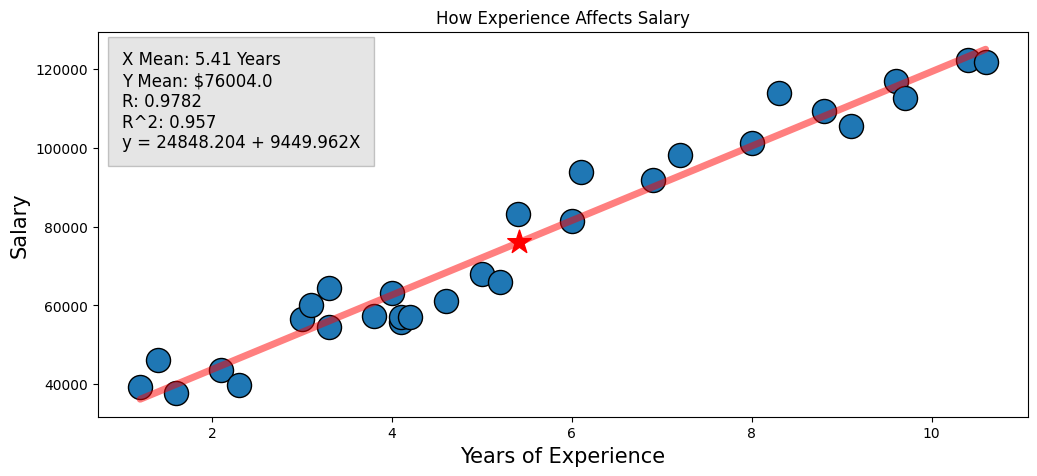

In [12]:
plt.figure(figsize=(12,5))
plt.scatter(x, y, s=300, linewidths=1, edgecolor='black')
text = '''X Mean: {} Years
Y Mean: ${}
R: {}
R^2: {}
y = {} + {}X'''.format(round(x.mean(), 2), 
                       round(y.mean(), 2), 
                       round(R, 4), 
                       round(R**2, 4),
                       round(B0, 3),
                       round(B1, 3))
plt.text(x=1, y=100000, s=text, fontsize=12, bbox={'facecolor': 'grey', 'alpha': 0.2, 'pad': 10})
plt.title('How Experience Affects Salary')
plt.xlabel('Years of Experience', fontsize=15)
plt.ylabel('Salary', fontsize=15)
plt.plot(x, B0 + B1*x, c = 'r', linewidth=5, alpha=.5, solid_capstyle='round')
plt.scatter(x=x.mean(), y=y.mean(), marker='*', s=10**2.5, c='r') # average point

Now we can use our calculations of the regression line to make predictions with new data that we come across. To create the predict() function, we just follow the formula for the simple linear regression line and plug in the values that we calculated as well as the new X value. This function will return the prediction y.

In [13]:
def predict(B0, B1, new_x):
    y = B0 + B1 * new_x
    return y

I hope this helped you learn or review the process of simple linear regression. Multiple linear regression and polynomial regression will be topics I will touch on in later articles.